In [1]:
#General plan for analysis of wine data
#Section 1: Data exploration and cleaning
#Section 2: Data description
#Section 3: Data analysis
#Section 4: User interface
#Section 5: Scope for future analysis

In [1]:
#Import dependencies
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import tkinter
from tkinter import messagebox
import pymsgbox
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap as Basemap
from matplotlib.colors import rgb2hex
from matplotlib.patches import Polygon
import plotly
import plotly.plotly as py
plotly.tools.set_credentials_file(username='vivekm03', api_key='lmIgFLUV45CXm44DKr5G')

In [2]:
#Read CSV file
df_wine = pd.read_csv('wine_150k.csv')
df_wine.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


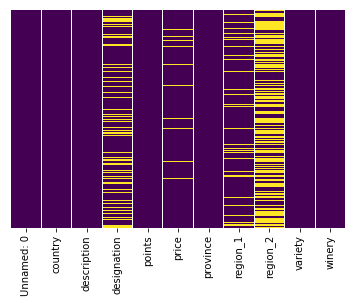

In [3]:
#Section 1: Data exploration and cleaning - Removing null values and columns
#How complete is our data - look at heat map
sns.heatmap(df_wine.isnull(),yticklabels=False, cbar=False, cmap='viridis')
plt.show()

Total records in orginal dataset: 150930
Total records after dropping duplicates: 97851
Total records after removing rows missing price: 89131


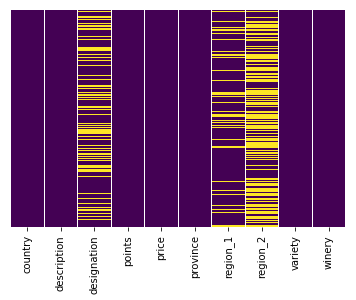

In [6]:
#Section 1: Data exploration and cleaning - Removing null values and columns and duplicates
#Get rid of index column
df_wine_dc=df_wine.drop(['Unnamed: 0'],axis=1).reset_index(drop=True)
print (f'Total records in orginal dataset: {len(df_wine_dc)}')
#Get rid of duplicates
df_wine_nodup=df_wine_dc.drop_duplicates()
print (f'Total records after dropping duplicates: {len(df_wine_nodup)}')
#Get rid of rows missing price
df_wine_nm=df_wine_nodup.dropna(subset=["price"])
print (f'Total records after removing rows missing price: {len(df_wine_nm)}')
#re-check heatmap on clean data
sns.heatmap(df_wine_nm.isnull(),yticklabels=False, cbar=False, cmap='viridis')
plt.show()

             points         price
count  89131.000000  89131.000000
mean      87.868340     33.658783
std        3.222199     37.670180
min       80.000000      4.000000
25%       86.000000     16.000000
50%       88.000000     25.000000
75%       90.000000     40.000000
max      100.000000   2300.000000
----------------------------------------------------
Number of varieties of wine in dataset: 619
Number of countries represented in dataset: 47
----------------------------------------------------
Price and Points scatter plot


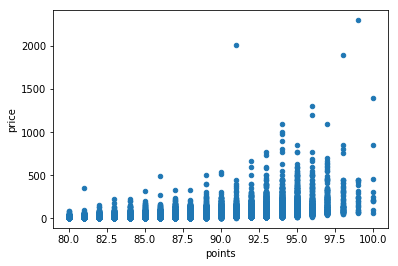

----------------------------------------------------
Set upper limit for price
Here are the percentiles for price:
0.80     45.0
0.90     60.0
0.95     80.0
0.99    152.7
Name: price, dtype: float64
Subset data to 99 percent 
 New data describe
             points         price
count  88239.000000  88239.000000
mean      87.808044     31.199912
std        3.170379     22.424568
min       80.000000      4.000000
25%       86.000000     16.000000
50%       88.000000     24.000000
75%       90.000000     40.000000
max      100.000000    152.000000
----------------------------------------------------
Percentage counts of top 10 countries:
               country
US           45.560769
Italy        13.587425
France       11.126978
Spain         6.006619
Chile         4.180833
Argentina     3.866902
Australia     3.472506
Portugal      3.064509
New Zealand   1.978784
Austria       1.807652
Percentage of data captured looking at top 10 countries: country    94.652976
dtype: float64
-----------

In [10]:
#Section 1: Data exploration and cleaning :Removing outliers and subsetting data
print(df_wine_nm.describe())
print("----------------------------------------------------")
print(f'Number of varieties of wine in dataset: {len(df_wine_nm["variety"].unique())}')
print(f'Number of countries represented in dataset: {len(df_wine_nm["country"].unique())}')
print("----------------------------------------------------")

#look at data ranges for setting upper limit
print("Price and Points scatter plot")
df_wine_nm.plot.scatter("points","price")
plt.show()
print("----------------------------------------------------")

#Get 95 percentile of price to subset data
print("Set upper limit for price")
print('Here are the percentiles for price:')
print( df_wine_nm["price"].quantile([0.80, 0.90, 0.95, 0.99]))
print("Subset data to 99 percent \n New data describe")
df_ul = df_wine_nm[df_wine_nm["price"] <= df_wine_nm["price"].quantile(0.99)]
print(df_ul.describe())
print("----------------------------------------------------")

# Looking at top 10 countries
print('Percentage counts of top 10 countries:')
s_pct_top10=pd.DataFrame(df_ul['country'].value_counts(normalize=True) * 100).head(10)
print (s_pct_top10)
pct_top10=s_pct_top10.sum()
print(f'Percentage of data captured looking at top 10 countries: {pct_top10}')
print("----------------------------------------------------")

# Looking at top 20 variety of wines among the top 10 countries
print('Percentage counts of top 20 variety:')
df_ul_t20v=df_ul.loc[[True if x in list(s_pct_top10.index) else False for x in df_ul["country"]],:]
s_pct_top20v=pd.DataFrame(df_ul_t20v['variety'].value_counts(normalize=True) * 100).head(20)
print (s_pct_top20v)
pct_top20v=s_pct_top20v.sum()
print(f'Percentage of data captured looking at top 20 wine varieties in top 10 countries: {pct_top20v}')

In [11]:
#Section 2: Data description - Binning price and points
#Create points and price category bins in data for analysis
#Point Binning
binspo1 = [80,85,90,95,101] 
labelspo1= ['Bronze','Silver','Gold','Platinum']
labelspo2= ['80-85','85-90','90-95','95-100']
df_ul['category'] = pd.cut(df_ul['points'], bins=binspo1 , labels= labelspo1)
df_ul['points_cat'] = pd.cut(df_ul['points'], bins=binspo1 , labels= labelspo2)

#Price Binning
binspr1=[0,10,20,30,40,50,60,80,100,500]
labelspr1=["<10", "10-20","20-30","30-40","40-50","50-60","60-80","80-100",">100"]
df_ul["price_cat"] = pd.cut(df_ul["price"], binspr1, labels=labelspr1)

#Create 'Other' category for country if not in top 9
df_ul['country_cat'] = df_ul['country'].apply(lambda x: x if x in list(s_pct_top10.index) else 'Other')


#Create 'Other' category for variety if not in top 20
df_ul['variety_cat'] = df_ul['variety'].apply(lambda x: x if x in list(s_pct_top20v.index) else 'Other')


C:\Users\vivek\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\vivek\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\vivek\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#ind

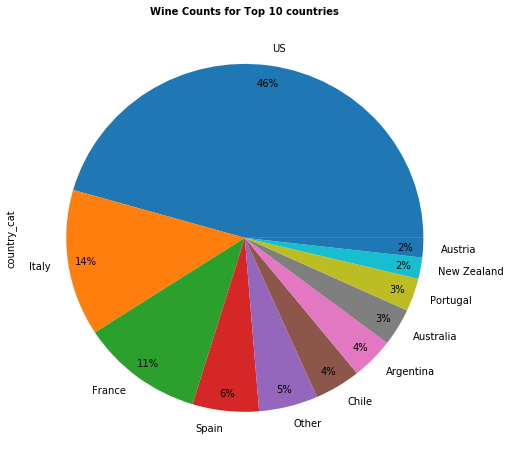

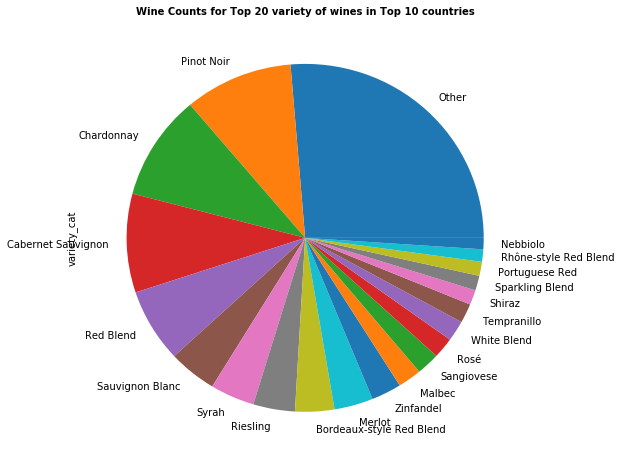

In [7]:
#Section 2: Data description - Charts describing data
#Distribution
#Create pie chart for top 10 countries
plotcc=df_ul['country_cat'].value_counts().plot.pie(figsize=(8,8), autopct='%1.0f%%', pctdistance=0.9)
plt.title('Wine Counts for Top 10 countries', weight='bold', size=10)
plt.show()

#Create pie chart for Top 20 varieties in top 10 countries
plotvc=df_ul['variety_cat'].value_counts().plot.pie(figsize=(8,8), pctdistance=0.9)
plt.title('Wine Counts for Top 20 variety of wines in Top 10 countries', weight='bold', size=10)
plt.show()


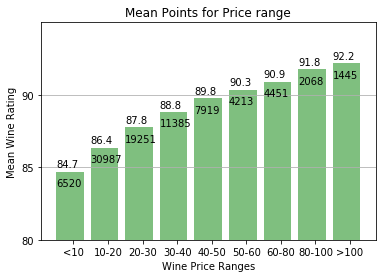

In [12]:
#Section 3: Data Analysis
#Look at price categories of wines and get descriptive stats per range
#Get counts of age groups

df_pr_grp_mean=df_ul.groupby("price_cat")["points"].mean()
df_pr_grp_ct=df_ul.groupby("price_cat")["points"].count()
df_pr_grp_stats=pd.DataFrame(df_pr_grp_mean).merge(pd.DataFrame(df_pr_grp_ct), on="price_cat")\
    .rename(columns={"points_x":"mean", "points_y":"ct"}).reset_index()
df_pr_grp_stats["mean_lab"]=round(df_pr_grp_stats["mean"],1).astype(str)

#Create figure
fig, ax=plt.subplots()
x_axis=np.arange(1,len(df_pr_grp_stats)+1,1)
y_ticks=np.arange(80,95,5)
ax.set_ylim(80,95) 

plt.bar(x_axis, df_pr_grp_stats["mean"], color='g', alpha=0.5, align="edge", width=0.8)

for i, d in enumerate(df_pr_grp_stats["price_cat"]):
        ax.text(x_axis[i], df_pr_grp_stats["mean"][i] +.3, df_pr_grp_stats["mean_lab"][i] ,color='black')
        ax.text(x_axis[i], df_pr_grp_stats["mean"][i] -1, df_pr_grp_stats["ct"][i] ,color='black')
        
#Create tick marks and tick labels
ax.set_xticks(x_axis+0.5)
ax.set_xticklabels(df_pr_grp_stats["price_cat"])
ax.set_yticks(y_ticks)

#Create Title, axes labels and gridlines
plt.title("Mean Points for Price range")
plt.ylabel("Mean Wine Rating")  
plt.xlabel("Wine Price Ranges")  
plt.grid(which='major',axis="y")

Correlation between points and Price - All Data
          points     price
points  1.000000  0.547738
price   0.547738  1.000000


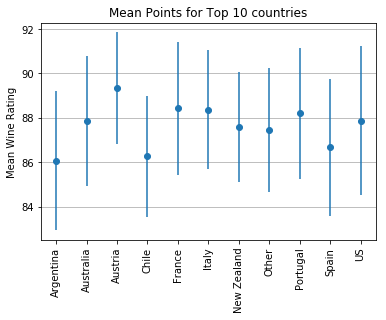

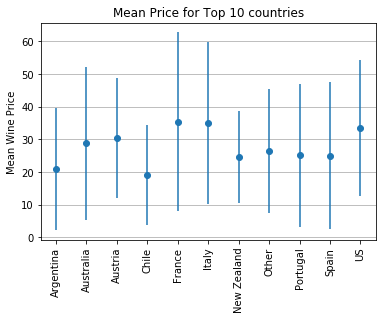

In [13]:
#Section 3: Data Analysis -  General correlation between price and points
#Look at general correlation between points and price in data
print("Correlation between points and Price - All Data")
print(df_ul[["points","price"]].corr())

# A) By Top 10 Countries
#Create mean and counts from country_cat
#Group by countrycat
df_cnycat_grp=df_ul.groupby("country_cat")
#Get stats for point and price
df_cnycat_pts_desc=pd.DataFrame(df_cnycat_grp["points","price"].describe(percentiles=[.5]))
#Flatten Multi_Index, drop and rename columns
df_cnycat_pts_desc.columns = ['_'.join(col).rstrip('_') for col in df_cnycat_pts_desc.columns.values]
df_cnycat_pts_desc.drop(['points_min', 'points_max', 'price_min', 'price_max', 'price_count'], axis=1, inplace=True)
df_cnycat_pts_desc.rename(columns={'points_50%':'point_med', 'price_50%':'price_med','points_count':'count'}, inplace=True)
#Calculate correlation between points and price and combine with other stats
df_cnycat_corr=pd.DataFrame(df_cnycat_grp["points","price"].corr()).reset_index().rename(columns={"price":"corr_pr_pts"})
df_cnycat_stats=df_cnycat_pts_desc.merge(df_cnycat_corr.loc[df_cnycat_corr["level_1"]=="points",\
                                ['country_cat',"corr_pr_pts"]],on="country_cat").round(2)
#df_cnycat_stats.sort_values(by=["mean"], ascending=False, inplace=True)
df_cnycat_stats

#Draw Error bar Plot for points
fig, ax=plt.subplots()
x_axis=np.arange(1,len(df_cnycat_stats)+1,1)
plt.errorbar(x_axis, df_cnycat_stats["points_mean"],\
             df_cnycat_stats["points_std"], linestyle='None', marker='o')
ax.set_xticks(x_axis)
ax.set_xticklabels(df_cnycat_stats["country_cat"], rotation=90)
plt.grid(which='major',axis="y")
plt.title("Mean Points for Top 10 countries")
plt.ylabel("Mean Wine Rating")  
plt.show()

#Draw Error bar Plot for price
fig, ax=plt.subplots()
x_axis=np.arange(1,len(df_cnycat_stats)+1,1)
plt.errorbar(x_axis, df_cnycat_stats["price_mean"],\
             df_cnycat_stats["price_std"], linestyle='None', marker='o')
ax.set_xticks(x_axis)
ax.set_xticklabels(df_cnycat_stats["country_cat"], rotation=90)
plt.grid(which='major',axis="y")
plt.title("Mean Price for Top 10 countries")
plt.ylabel("Mean Wine Price")  
plt.show()



In [14]:
#Section 3: Data Analysis - Which state produces best wines in US
#Subset for US
df_us=df_ul.loc[df_ul['country']=="US"]
df_usstates_grp=df_us.groupby("province")
#Get stats for point and price
df_usstates_pts_desc=pd.DataFrame(df_usstates_grp["points","price"].describe(percentiles=[.5]))
#Flatten Multi_Index, drop and rename columns
df_usstates_pts_desc.columns = ['_'.join(col).rstrip('_') for col in df_usstates_pts_desc.columns.values]
df_usstates_pts_desc.drop(['points_min', 'points_max', 'price_min', 'price_max', 'price_count'], axis=1, inplace=True)
df_usstates_pts_desc.rename(columns={'points_50%':'point_med', 'price_50%':'price_med','points_count':'count'}\
                            , inplace=True)
df_states=df_usstates_pts_desc.round(2).sort_values(by=["points_mean"], ascending=False)

#Create state codes to use for Plotly data
df_states_clean=df_states.drop(['America','Washington-Oregon'], axis=0)
df_states_clean.reset_index(inplace=True)
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
}

#Merge the state code dictionary with the States DataFrame
df_st_cd=pd.DataFrame.from_dict(us_state_abbrev, orient='index').reset_index()
df_st_cd.rename(columns={df_st_cd.columns[0]:'state',df_st_cd.columns[1]:'state_cd'},inplace=True)
df_states_clean.rename(columns={'province':'state'}, inplace=True)
df_st=df_states_clean.merge(df_st_cd, on="state")

In [15]:
#Section 3: Data Analysis - Which state produces best wines in US
#Use Plotly to plot the mean value of the states in the US map

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

df_st['text'] = df_st['state'] + '<br>' +\
    'Count:'+df_st['count'].astype(str) + '<br>' +\
    'Mean Wine Rating:'+df_st['points_mean'].astype(str) + '<br>' +\
    'Std Dev:'+df_st['points_std'].astype(str)

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = df_st['state_cd'],
        z = df_st['points_mean'].astype(float),
        locationmode = 'USA-states',
        text = df_st['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Wine Rating")
        ) ]

layout = dict(
        title = 'Mean Wine Ratings per state in US (Hover for breakdown)',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
py.iplot( fig, filename='d3-cloropleth-map' )


High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~vivekm03/0 or inside your plot.ly account where it is named 'd3-cloropleth-map'


In [16]:
#Section 4: User interface
#test = messagebox.askyesno("Confirm Access","Would you like to help us in searching of a better Wine for you?")
test_1 = pymsgbox.confirm(text='Would you like to help us in searching of a better Wine for you?"', title='Choose One', buttons=['Yes', 'No'])
#shop_wine = input("Would you like to help us in searching of a better Wine for you?")
#wishlist = []
if test_1 == "Yes":
    print("Welcome to the House of Wines! Here are some Wines from around the World:")
    country = df_ul['country'].unique()
    print(country)
    pick = input("Please select the Country you are specifically looking for a wine from:")
    print("You selected:", pick)    
else:
    print("No data found!!!")

No data found!!!


In [17]:
#Section 4: User interface
picked_country = df_ul.loc[df_ul["country"] == pick]
#picked_country
user_pick_variety = picked_country['variety_cat'].unique()
print(user_pick_variety)

NameError: name 'pick' is not defined

In [ ]:
#Section 4: User interface
user_choice = input("Please enter variety of Wine:")
print ("User chose:", user_choice)




In [ ]:
#Section 4: User interface
user_choice_wine = picked_country[picked_country["variety_cat"]== user_choice]
print(user_choice_wine)




In [ ]:
#Section 4: User interface
user_choice_price = input("Please enter price Range of Wine:")
print ("User choose:", user_choice_price)
user_choice_price_1 = user_choice_wine[user_choice_wine["price_cat"]== user_choice_price]
user_choice_price_2 = user_choice_price_1.sort_values(by=["points"], ascending=False).head(20)
user_choice_price_3 = user_choice_price_2.drop(['description','country_cat','variety_cat','price_cat','points_cat'],axis=1)
print(user_choice_price_3.head(10))






In [24]:
# define method - ratings
# create new column - 'ratings'
# input points bin
# if point between 80-85, assign random rating between 1 and 3
# if point between 85-90, assign random rating between 2 and 4
# if point between 90-95, assign random rating between 4 and 5
# if point between 95-100, assign random rating between 4.5 and 5

file50['rating']= file50['points']
file50

C:\Users\Dhruv\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,country,description,points,price,province,variety,winery,category,rating
0,US,This tremendous 100% varietal wine hails from ...,96,235.0,California,Cabernet Sauvignon,Heitz,Platinum,96
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",96,110.0,Northern Spain,Tinta de Toro,Bodega Carmen Rodríguez,Platinum,96
2,US,Mac Watson honors the memory of a wine once ma...,96,90.0,California,Sauvignon Blanc,Macauley,Platinum,96
3,US,"This spent 20 months in 30% new French oak, an...",96,65.0,Oregon,Pinot Noir,Ponzi,Platinum,96
4,France,"This is the top wine from La Bégude, named aft...",95,66.0,Provence,Provence red blend,Domaine de la Bégude,Gold,95
5,Spain,"Deep, dense and pure from the opening bell, th...",95,73.0,Northern Spain,Tinta de Toro,Numanthia,Gold,95
6,Spain,Slightly gritty black-fruit aromas include a s...,95,65.0,Northern Spain,Tinta de Toro,Maurodos,Gold,95
7,Spain,Lush cedary black-fruit aromas are luxe and of...,95,110.0,Northern Spain,Tinta de Toro,Bodega Carmen Rodríguez,Gold,95
8,US,This re-named vineyard was formerly bottled as...,95,65.0,Oregon,Pinot Noir,Bergström,Gold,95
9,US,The producer sources from two blocks of the vi...,95,60.0,California,Pinot Noir,Blue Farm,Gold,95


### Correlate, but randomize rating 

In [25]:
rating_list = []
np.random.seed(9)
for ratings in file50['rating']:
    
    #if(ratings<85):
     #   for price in file50['price']:
    #      w_ratings = price/10 + (np.random.rand() * (4 - 2))
    #        w_ratings=round(w_ratings,1)
    #        rating_list.append(w_ratings)
#print(rating_list)
    
    if (ratings<85):
        w_ratings = 2+ (np.random.rand()*(3-1))
        w_ratings= round(w_ratings,1)
        rating_list.append(w_ratings)
        
    elif((ratings>=85) & (ratings<=90)):
        w_ratings = 2 + (np.random.rand() * (4 - 2))
        w_ratings=round(w_ratings,1)
        rating_list.append(w_ratings)
    
    elif((ratings >=90) & (ratings<=95)):
        w_ratings = 3 + (np.random.rand() * (5 - 3))
        w_ratings=round(w_ratings,1)
        rating_list.append(w_ratings)
    
    elif(ratings>95):
        w_ratings = 4 + (np.random.rand() * (5 - 4))
        w_ratings=round(w_ratings,1)
        rating_list.append(w_ratings)

In [26]:
rating_list

[4.0,
 4.5,
 4.5,
 4.1,
 3.3,
 3.4,
 3.8,
 3.5,
 3.2,
 3.7,
 3.3,
 4.8,
 4.9,
 3.1,
 4.4,
 4.1,
 4.8,
 4.3,
 4.1,
 4.4,
 3.8,
 4.4,
 4.6,
 3.9,
 4.9,
 4.6,
 5.0,
 3.3,
 4.0,
 4.9,
 3.3,
 3.7,
 3.9,
 2.4,
 2.5,
 3.7,
 3.8,
 3.5,
 2.7,
 2.9,
 3.2,
 3.0,
 3.0,
 2.9,
 3.7,
 2.4,
 3.4,
 3.4,
 3.9,
 2.1,
 3.3,
 3.3,
 2.9,
 2.1,
 2.1,
 2.3,
 3.6,
 2.3,
 3.3,
 3.7,
 4.0,
 4.4,
 4.6,
 3.5,
 4.8,
 3.0,
 3.8,
 3.4,
 3.7,
 3.9,
 4.0,
 3.8,
 3.4,
 3.4,
 3.5,
 4.5,
 3.8,
 4.2,
 4.0,
 3.9,
 4.5,
 4.1,
 3.6,
 4.9,
 3.4,
 3.3,
 3.2,
 3.0,
 2.4,
 2.2,
 3.1,
 2.6,
 2.2,
 3.0,
 3.3,
 2.1,
 3.0,
 2.2,
 3.6,
 3.5,
 2.5,
 2.2,
 3.8,
 3.0,
 2.3,
 2.2,
 3.7,
 3.1,
 2.5,
 3.2,
 2.6,
 3.6,
 3.0,
 3.9,
 3.0,
 4.8,
 3.5,
 4.0,
 4.0,
 4.6,
 3.1,
 3.7,
 3.6,
 2.8,
 2.1,
 3.5,
 3.4,
 3.8,
 3.1,
 3.9,
 2.6,
 2.7,
 3.5,
 3.4,
 3.5,
 3.8,
 3.4,
 3.4,
 3.7,
 3.3,
 2.6,
 3.7,
 2.5,
 3.4,
 3.1,
 2.8,
 2.4,
 3.8,
 2.2,
 3.6,
 3.4,
 2.9,
 3.3,
 2.6,
 3.7,
 2.4,
 3.2,
 2.9,
 3.3,
 3.0,
 3.9,
 3.7,
 3.8,
 2.1,
 2.3,
 3.0,
 3.5

In [27]:
label=['wine_ratings']
new_df = pd.DataFrame(rating_list, columns =label)
new_df

,wine_ratings
0,4.0
1,4.5
2,4.5
3,4.1
4,3.3
5,3.4
6,3.8
7,3.5
8,3.2
9,3.7


In [28]:
file50.columns
file25=pd.concat([file50,new_df], axis=1)
file25

,country,description,points,price,province,variety,winery,category,rating,wine_ratings
0,US,This tremendous 100% varietal wine hails from ...,96.0,235.0,California,Cabernet Sauvignon,Heitz,Platinum,96.0,4.0
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",96.0,110.0,Northern Spain,Tinta de Toro,Bodega Carmen Rodríguez,Platinum,96.0,4.5
2,US,Mac Watson honors the memory of a wine once ma...,96.0,90.0,California,Sauvignon Blanc,Macauley,Platinum,96.0,4.5
3,US,"This spent 20 months in 30% new French oak, an...",96.0,65.0,Oregon,Pinot Noir,Ponzi,Platinum,96.0,4.1
4,France,"This is the top wine from La Bégude, named aft...",95.0,66.0,Provence,Provence red blend,Domaine de la Bégude,Gold,95.0,3.3
5,Spain,"Deep, dense and pure from the opening bell, th...",95.0,73.0,Northern Spain,Tinta de Toro,Numanthia,Gold,95.0,3.4
6,Spain,Slightly gritty black-fruit aromas include a s...,95.0,65.0,Northern Spain,Tinta de Toro,Maurodos,Gold,95.0,3.8
7,Spain,Lush cedary black-fruit aromas are luxe and of...,95.0,110.0,Northern Spain,Tinta de Toro,Bodega Carmen Rodríguez,Gold,95.0,3.5
8,US,This re-named vineyard was formerly bottled as...,95.0,65.0,Oregon,Pinot Noir,Bergström,Gold,95.0,3.2
9,US,The producer sources from two blocks of the vi...,95.0,60.0,California,Pinot Noir,Blue Farm,Gold,95.0,3.7


In [29]:
file25.drop('rating', axis=1, inplace = True)
file25

,country,description,points,price,province,variety,winery,category,wine_ratings
0,US,This tremendous 100% varietal wine hails from ...,96.0,235.0,California,Cabernet Sauvignon,Heitz,Platinum,4.0
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",96.0,110.0,Northern Spain,Tinta de Toro,Bodega Carmen Rodríguez,Platinum,4.5
2,US,Mac Watson honors the memory of a wine once ma...,96.0,90.0,California,Sauvignon Blanc,Macauley,Platinum,4.5
3,US,"This spent 20 months in 30% new French oak, an...",96.0,65.0,Oregon,Pinot Noir,Ponzi,Platinum,4.1
4,France,"This is the top wine from La Bégude, named aft...",95.0,66.0,Provence,Provence red blend,Domaine de la Bégude,Gold,3.3
5,Spain,"Deep, dense and pure from the opening bell, th...",95.0,73.0,Northern Spain,Tinta de Toro,Numanthia,Gold,3.4
6,Spain,Slightly gritty black-fruit aromas include a s...,95.0,65.0,Northern Spain,Tinta de Toro,Maurodos,Gold,3.8
7,Spain,Lush cedary black-fruit aromas are luxe and of...,95.0,110.0,Northern Spain,Tinta de Toro,Bodega Carmen Rodríguez,Gold,3.5
8,US,This re-named vineyard was formerly bottled as...,95.0,65.0,Oregon,Pinot Noir,Bergström,Gold,3.2
9,US,The producer sources from two blocks of the vi...,95.0,60.0,California,Pinot Noir,Blue Farm,Gold,3.7


In [30]:
file25.count()

country         90254
description     90254
points          90254
price           90254
province        90254
variety         90254
winery          90254
category        89835
wine_ratings    90254
dtype: int64

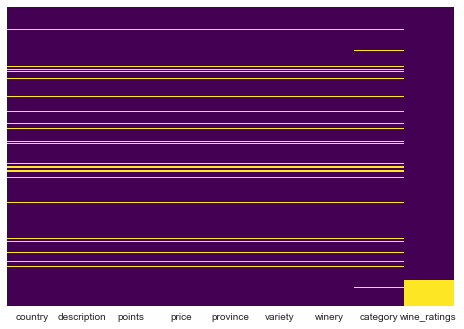

In [31]:
sns.heatmap(file25.isnull(),yticklabels=False, cbar=False, cmap='viridis')
plt.show()

In [32]:
file25.dropna(how = 'any', inplace=True)

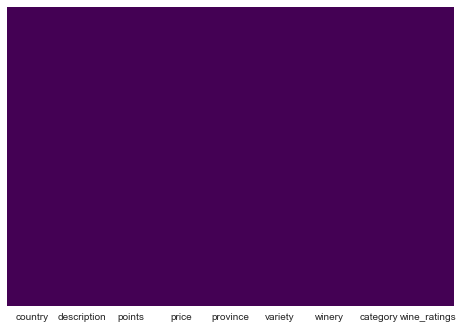

In [33]:
sns.heatmap(file25.isnull(),yticklabels=False, cbar=False, cmap='viridis')
plt.show()

In [34]:
file25.count()

country         81188
description     81188
points          81188
price           81188
province        81188
variety         81188
winery          81188
category        81188
wine_ratings    81188
dtype: int64

In [35]:
file25

,country,description,points,price,province,variety,winery,category,wine_ratings
0,US,This tremendous 100% varietal wine hails from ...,96.0,235.0,California,Cabernet Sauvignon,Heitz,Platinum,4.0
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",96.0,110.0,Northern Spain,Tinta de Toro,Bodega Carmen Rodríguez,Platinum,4.5
2,US,Mac Watson honors the memory of a wine once ma...,96.0,90.0,California,Sauvignon Blanc,Macauley,Platinum,4.5
3,US,"This spent 20 months in 30% new French oak, an...",96.0,65.0,Oregon,Pinot Noir,Ponzi,Platinum,4.1
4,France,"This is the top wine from La Bégude, named aft...",95.0,66.0,Provence,Provence red blend,Domaine de la Bégude,Gold,3.3
5,Spain,"Deep, dense and pure from the opening bell, th...",95.0,73.0,Northern Spain,Tinta de Toro,Numanthia,Gold,3.4
6,Spain,Slightly gritty black-fruit aromas include a s...,95.0,65.0,Northern Spain,Tinta de Toro,Maurodos,Gold,3.8
7,Spain,Lush cedary black-fruit aromas are luxe and of...,95.0,110.0,Northern Spain,Tinta de Toro,Bodega Carmen Rodríguez,Gold,3.5
8,US,This re-named vineyard was formerly bottled as...,95.0,65.0,Oregon,Pinot Noir,Bergström,Gold,3.2
9,US,The producer sources from two blocks of the vi...,95.0,60.0,California,Pinot Noir,Blue Farm,Gold,3.7


In [36]:
user_id = []
np.random.seed(7)
for ids in file25['description']:
    
    if (len(ids)<25):
        u_ids = np.random.randint(1,50)
        user_id.append(u_ids)    
    elif ((len(ids)>=25) & (len(ids)<50)):
        u_ids = np.random.randint(50,100)
        user_id.append(u_ids)
    elif ((len(ids)>=50) & (len(ids)<=100)):
        u_ids = np.random.randint(100,300)
        user_id.append(u_ids)    
    elif (len(ids)>100):
        u_ids = np.random.randint(300,500)
        user_id.append(u_ids)
        

### why did the # jumped to 178K?

In [37]:
len(user_id)

81188

In [38]:
label_df=['user_id']
uid_df = pd.DataFrame(user_id, columns =label_df)
uid_df.head()

,user_id
0,475
1,496
2,325
3,367
4,451


In [39]:
file25=pd.concat([file25,uid_df], axis=1)
file25

,country,description,points,price,province,variety,winery,category,wine_ratings,user_id
0,US,This tremendous 100% varietal wine hails from ...,96.0,235.0,California,Cabernet Sauvignon,Heitz,Platinum,4.0,475.0
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",96.0,110.0,Northern Spain,Tinta de Toro,Bodega Carmen Rodríguez,Platinum,4.5,496.0
2,US,Mac Watson honors the memory of a wine once ma...,96.0,90.0,California,Sauvignon Blanc,Macauley,Platinum,4.5,325.0
3,US,"This spent 20 months in 30% new French oak, an...",96.0,65.0,Oregon,Pinot Noir,Ponzi,Platinum,4.1,367.0
4,France,"This is the top wine from La Bégude, named aft...",95.0,66.0,Provence,Provence red blend,Domaine de la Bégude,Gold,3.3,451.0
5,Spain,"Deep, dense and pure from the opening bell, th...",95.0,73.0,Northern Spain,Tinta de Toro,Numanthia,Gold,3.4,403.0
6,Spain,Slightly gritty black-fruit aromas include a s...,95.0,65.0,Northern Spain,Tinta de Toro,Maurodos,Gold,3.8,392.0
7,Spain,Lush cedary black-fruit aromas are luxe and of...,95.0,110.0,Northern Spain,Tinta de Toro,Bodega Carmen Rodríguez,Gold,3.5,485.0
8,US,This re-named vineyard was formerly bottled as...,95.0,65.0,Oregon,Pinot Noir,Bergström,Gold,3.2,442.0
9,US,The producer sources from two blocks of the vi...,95.0,60.0,California,Pinot Noir,Blue Farm,Gold,3.7,323.0


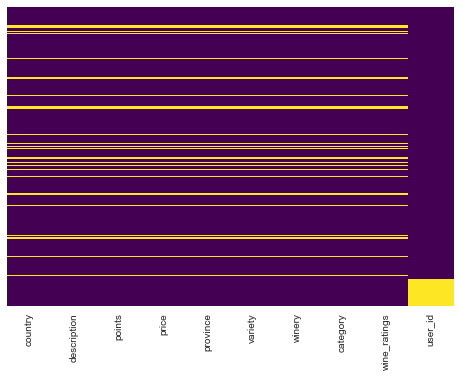

In [40]:
sns.heatmap(file25.isnull(),yticklabels=False, cbar=False, cmap='viridis')
plt.show()

In [41]:
file25.count()

country         81188
description     81188
points          81188
price           81188
province        81188
variety         81188
winery          81188
category        81188
wine_ratings    81188
user_id         81188
dtype: int64

In [42]:
file25.dropna(how = 'any', inplace=True)
file25.count()

country         73024
description     73024
points          73024
price           73024
province        73024
variety         73024
winery          73024
category        73024
wine_ratings    73024
user_id         73024
dtype: int64

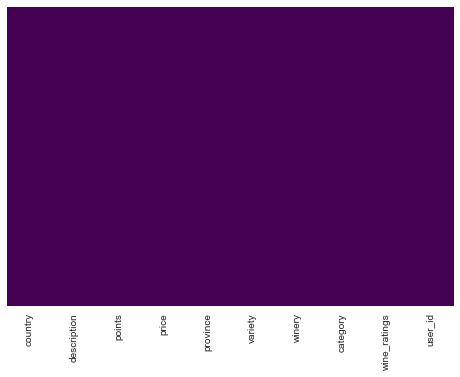

In [43]:
sns.heatmap(file25.isnull(),yticklabels=False, cbar=False, cmap='viridis')
plt.show()

In [44]:
file25.head()

,country,description,points,price,province,variety,winery,category,wine_ratings,user_id
0,US,This tremendous 100% varietal wine hails from ...,96.0,235.0,California,Cabernet Sauvignon,Heitz,Platinum,4.0,475.0
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",96.0,110.0,Northern Spain,Tinta de Toro,Bodega Carmen Rodríguez,Platinum,4.5,496.0
2,US,Mac Watson honors the memory of a wine once ma...,96.0,90.0,California,Sauvignon Blanc,Macauley,Platinum,4.5,325.0
3,US,"This spent 20 months in 30% new French oak, an...",96.0,65.0,Oregon,Pinot Noir,Ponzi,Platinum,4.1,367.0
4,France,"This is the top wine from La Bégude, named aft...",95.0,66.0,Provence,Provence red blend,Domaine de la Bégude,Gold,3.3,451.0


In [45]:
file25.describe()

,points,price,wine_ratings,user_id
count,73024.000000,73024.000000,73024.000000,73024.000000
mean,88.041178,33.745344,3.214981,397.343011
std,3.055945,38.836235,0.712980,61.043111
min,81.000000,4.000000,2.000000,3.000000
25%,86.000000,16.000000,2.600000,348.000000
50%,88.000000,25.000000,3.200000,398.000000
75%,90.000000,40.000000,3.700000,449.000000
max,100.000000,2300.000000,5.000000,499.000000


In [46]:
file25['user_id'].nunique()

406

In [47]:
file25['variety'].nunique()

566

In [48]:
file25['country'].nunique()

45

In [49]:
file25['category'].nunique()

4

In [50]:
file25['description'][400]

'The aromas that come together are those of scorched earth, grilled porcini, roasted coffee bean and a bit of burnt rubber. The mature palate offers dried cherry, blackberry confiture, mocha, vanilla and a hint of game alongside tongue-drying tannins that clench the finish. Give this a few years to unfold then drink sooner rather than later.'

In [51]:
time_df = pd.read_csv('timestamp.csv')
time_df.count()

timestamp    100004
dtype: int64

In [52]:
timestamp = datetime.datetime.fromtimestamp(1462644085)
print(timestamp.strftime('%Y-%m-%d %H:%M:%S'))

2016-05-07 14:01:25


In [53]:
timestamp = time_df[:73025]

In [54]:
labels_t_df=['timestamp']
time_df = pd.DataFrame(timestamp, columns =labels_t_df)
time_df.head()

,timestamp
0,1260759144
1,1260759179
2,1260759182
3,1260759185
4,1260759205


In [55]:
file25=pd.concat([file25,time_df], axis=1)
file25.head()

,country,description,points,price,province,variety,winery,category,wine_ratings,user_id,timestamp
0,US,This tremendous 100% varietal wine hails from ...,96.0,235.0,California,Cabernet Sauvignon,Heitz,Platinum,4.0,475.0,1.260759e+09
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",96.0,110.0,Northern Spain,Tinta de Toro,Bodega Carmen Rodríguez,Platinum,4.5,496.0,1.260759e+09
2,US,Mac Watson honors the memory of a wine once ma...,96.0,90.0,California,Sauvignon Blanc,Macauley,Platinum,4.5,325.0,1.260759e+09
3,US,"This spent 20 months in 30% new French oak, an...",96.0,65.0,Oregon,Pinot Noir,Ponzi,Platinum,4.1,367.0,1.260759e+09
4,France,"This is the top wine from La Bégude, named aft...",95.0,66.0,Provence,Provence red blend,Domaine de la Bégude,Gold,3.3,451.0,1.260759e+09


In [56]:
file25.describe()

,points,price,wine_ratings,user_id,timestamp
count,73024.000000,73024.000000,73024.000000,73024.000000,7.302500e+04
mean,88.041178,33.745344,3.214981,397.343011,1.138014e+09
std,3.055945,38.836235,0.712980,61.043111,1.933842e+08
min,81.000000,4.000000,2.000000,3.000000,7.896520e+08
25%,86.000000,16.000000,2.600000,348.000000,9.650923e+08
50%,88.000000,25.000000,3.200000,398.000000,1.111579e+09
75%,90.000000,40.000000,3.700000,449.000000,1.299451e+09
max,100.000000,2300.000000,5.000000,499.000000,1.476641e+09


In [57]:
file25.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80094 entries, 0 to 81187
Data columns (total 11 columns):
country         73024 non-null object
description     73024 non-null object
points          73024 non-null float64
price           73024 non-null float64
province        73024 non-null object
variety         73024 non-null object
winery          73024 non-null object
category        73024 non-null object
wine_ratings    73024 non-null float64
user_id         73024 non-null float64
timestamp       73025 non-null float64
dtypes: float64(5), object(6)
memory usage: 7.3+ MB


### Where did the NaN values came from

In [58]:
file25.dropna(how='any', inplace=True)
file25.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65955 entries, 0 to 73024
Data columns (total 11 columns):
country         65955 non-null object
description     65955 non-null object
points          65955 non-null float64
price           65955 non-null float64
province        65955 non-null object
variety         65955 non-null object
winery          65955 non-null object
category        65955 non-null object
wine_ratings    65955 non-null float64
user_id         65955 non-null float64
timestamp       65955 non-null float64
dtypes: float64(5), object(6)
memory usage: 6.0+ MB


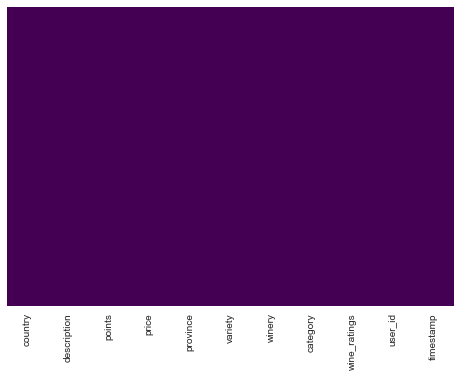

In [59]:
sns.heatmap(file25.isnull(),yticklabels=False, cbar=False, cmap='viridis')
plt.show()

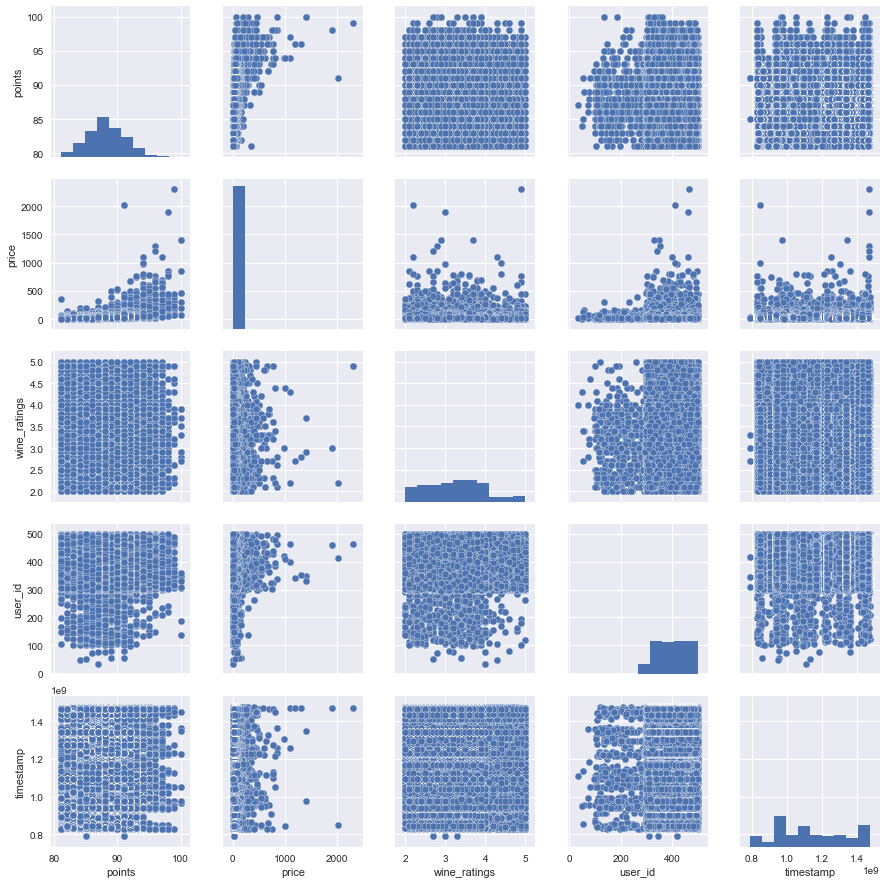

In [60]:
sns.pairplot(file25)
plt.show()

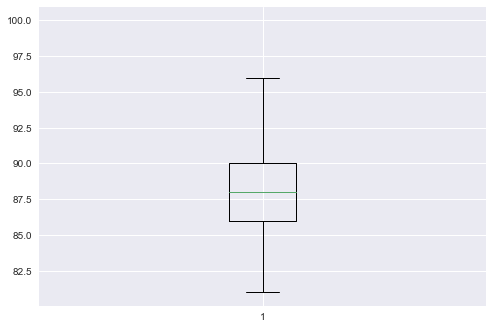

In [61]:
plt.boxplot(file25['points'])
plt.show()

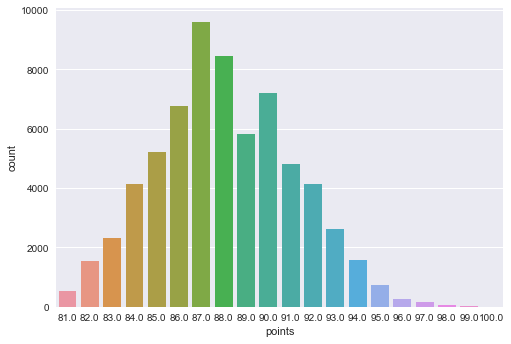

In [62]:
sns.countplot(x = file25['points'])
plt.show()

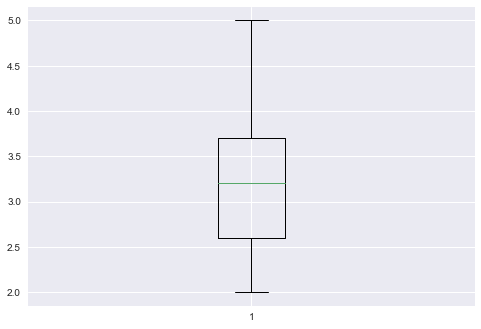

In [63]:
plt.boxplot(file25['wine_ratings'])
plt.show()

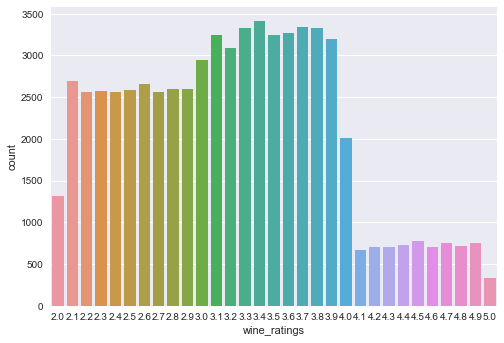

In [64]:
sns.countplot(x = file25['wine_ratings'])
plt.show()

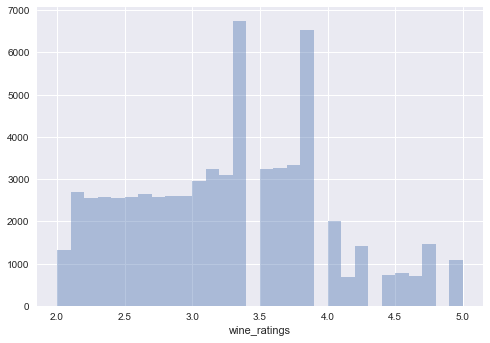

In [65]:
sns.distplot(file25['wine_ratings'], kde=False, bins=30)
plt.show()

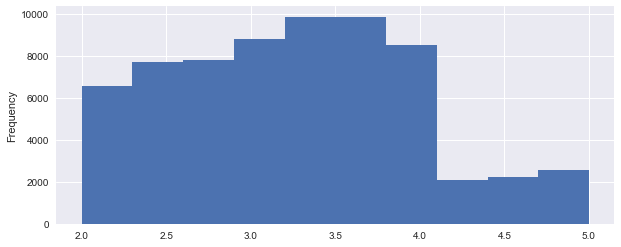

In [66]:
file25['wine_ratings'].plot.hist(figsize=(10,4))
plt.show()

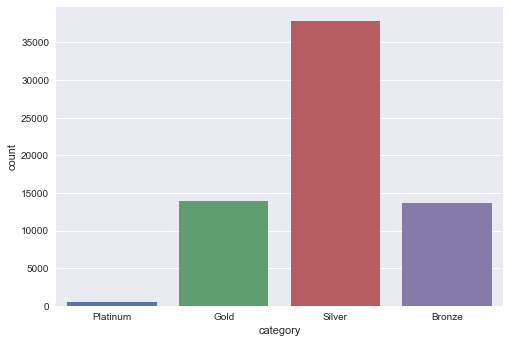

In [67]:
sns.countplot(x = file25['category']),
plt.show()

### How can I view clutter free more than 100 countries

In [68]:
first100_countries = file25['country'][:100]

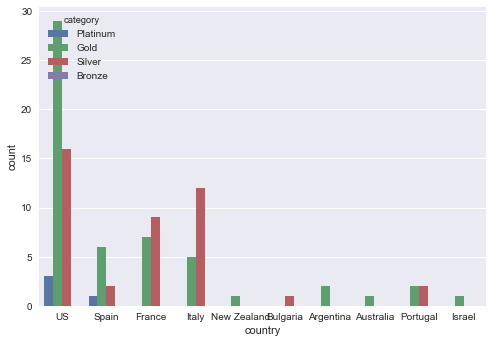

In [69]:
sns.countplot(x = first100_countries, hue=file25['category'])
plt.show()

### Why xlim does not cut off to 500?

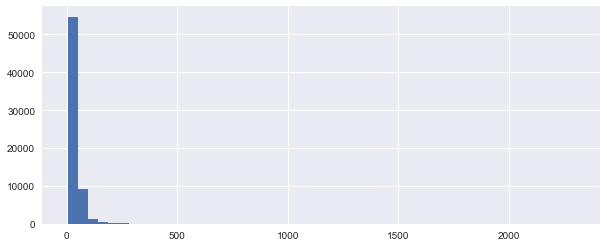

In [70]:
file25['price'].hist(bins=50, figsize=(10,4))
plt.xlim=(0,500)
plt.show()

In [88]:
import cufflinks as cf

In [89]:
cf.go_offline()

### How to visualize this better?

In [93]:
file25['price'].iplot(kind='hist', bins=10)

### Machine Learning

In [71]:
file25.corr()

,points,price,wine_ratings,user_id,timestamp
points,1.000000,0.436915,0.026343,0.003222,0.040962
price,0.436915,1.000000,0.014055,0.002983,0.022339
wine_ratings,0.026343,0.014055,1.000000,0.012103,0.030668
user_id,0.003222,0.002983,0.012103,1.000000,0.005715
timestamp,0.040962,0.022339,0.030668,0.005715,1.000000


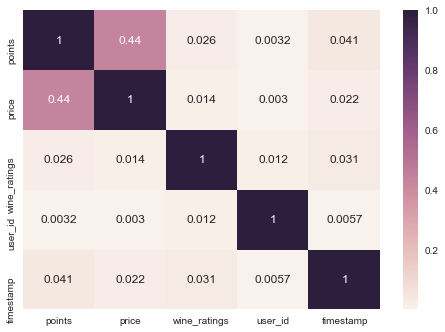

In [72]:
sns.heatmap(file25.corr(), annot=True)
plt.show()

In [73]:
X = file25[['points','wine_ratings']]
X

,points,wine_ratings
0,96.0,4.0
1,96.0,4.5
2,96.0,4.5
3,96.0,4.1
4,95.0,3.3
5,95.0,3.4
6,95.0,3.8
7,95.0,3.5
8,95.0,3.2
9,95.0,3.7


In [74]:
y = file25['price']
y

0        235.0
1        110.0
2         90.0
3         65.0
4         66.0
5         73.0
6         65.0
7        110.0
8         65.0
9         60.0
10        80.0
11        48.0
12        48.0
13        90.0
14       185.0
15        90.0
16       325.0
17        80.0
18       290.0
19        75.0
20        24.0
21        79.0
22       220.0
23        60.0
24        45.0
25        57.0
26        62.0
27       105.0
28        60.0
29        60.0
         ...  
72995     35.0
72996     22.0
72997     10.0
72998     10.0
72999     14.0
73000     25.0
73001     17.0
73002     20.0
73003     40.0
73004     13.0
73005     25.0
73006     14.0
73007     18.0
73008     11.0
73009     12.0
73010     12.0
73011     18.0
73012     14.0
73013     25.0
73014     18.0
73015     12.0
73016     11.0
73017     22.0
73018     15.0
73019     17.0
73020     10.0
73021     28.0
73022     15.0
73023     15.0
73024     40.0
Name: price, dtype: float64

In [75]:
from sklearn.cross_validation import train_test_split

C:\Users\Dhruv\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [77]:
from sklearn.linear_model import LinearRegression

In [78]:
lm = LinearRegression()

In [79]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [80]:
print(lm.intercept_)

-453.1358969699171


In [81]:
lm.coef_

array([ 5.53582601, -0.14609935])

In [82]:
cdf = pd.DataFrame(lm.coef_,X.columns,columns= ['Coeff'])
cdf

,Coeff
points,5.535826
wine_ratings,-0.146099


In [83]:
predictions= lm.predict(X_test)

In [84]:
predictions

array([33.59310387, 50.11292229, 55.72179797, ..., 27.76507916,
       55.6487483 , 33.37395484])

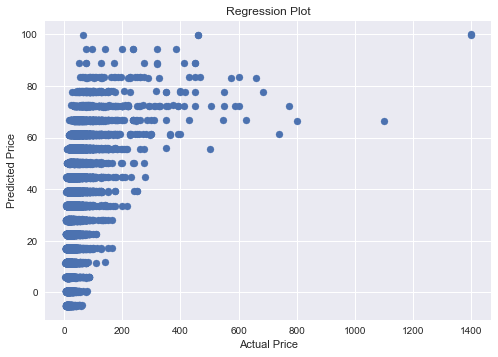

In [85]:
plt.scatter(y_test,predictions)
plt.title("Regression Plot")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()

In [86]:
from sklearn import metrics

In [87]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

34.36814442353246

In [ ]:
metrics.mean_squared_error(y_test, predictions)

### How to continue on second notebook, link data

In [94]:
variety= pd.get_dummies(file25['variety'], drop_first=True)

In [96]:
category = pd.get_dummies(file25['category'], drop_first=True)

In [97]:
variety.head()

,Aglianico,Aidani,Airen,Albana,Albariño,Albarossa,Albarín,Aleatico,Alfrocheiro,Alicante,...,Xinisteri,Xinomavro,Yapincak,Zibibbo,Zierfandler,Zierfandler-Rotgipfler,Zinfandel,Zlahtina,Zweigelt,Žilavka
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [98]:
category.head()

,Gold,Platinum,Silver
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,1,0,0


In [110]:
file100=pd.concat([file25, category,variety], axis=1)

In [111]:
file100.head()

,country,description,points,price,province,winery,wine_ratings,user_id,timestamp,Gold,...,Xinisteri,Xinomavro,Yapincak,Zibibbo,Zierfandler,Zierfandler-Rotgipfler,Zinfandel,Zlahtina,Zweigelt,Žilavka
0,US,This tremendous 100% varietal wine hails from ...,96.0,235.0,California,Heitz,4.0,475.0,1.260759e+09,0,...,0,0,0,0,0,0,0,0,0,0
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",96.0,110.0,Northern Spain,Bodega Carmen Rodríguez,4.5,496.0,1.260759e+09,0,...,0,0,0,0,0,0,0,0,0,0
2,US,Mac Watson honors the memory of a wine once ma...,96.0,90.0,California,Macauley,4.5,325.0,1.260759e+09,0,...,0,0,0,0,0,0,0,0,0,0
3,US,"This spent 20 months in 30% new French oak, an...",96.0,65.0,Oregon,Ponzi,4.1,367.0,1.260759e+09,0,...,0,0,0,0,0,0,0,0,0,0
4,France,"This is the top wine from La Bégude, named aft...",95.0,66.0,Provence,Domaine de la Bégude,3.3,451.0,1.260759e+09,1,...,0,0,0,0,0,0,0,0,0,0


In [113]:
#file100.drop(['variety', 'category'], axis = 1, inplace=True)

In [114]:
file100.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65955 entries, 0 to 73024
Columns: 564 entries, country to Žilavka
dtypes: float64(5), object(4), uint8(555)
memory usage: 39.9+ MB


In [115]:
file100.columns

Index(['country', 'description', 'points', 'price', 'province', 'winery',
       'wine_ratings', 'user_id', 'timestamp', 'Gold',
       ...
       'Xinisteri', 'Xinomavro', 'Yapincak', 'Zibibbo', 'Zierfandler',
       'Zierfandler-Rotgipfler', 'Zinfandel', 'Zlahtina', 'Zweigelt',
       'Žilavka'],
      dtype='object', length=564)

In [117]:
X = file100.drop(['country', 'description', 'province', 'winery'], axis=1)

In [172]:
y= file100['Gold']

In [173]:
from sklearn.cross_validation import train_test_split

In [174]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)

In [175]:
from sklearn.linear_model import LogisticRegression

In [176]:
logmodel = LogisticRegression()

In [177]:
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [178]:
predictions=logmodel.predict(X_test)

In [179]:
from sklearn.metrics import classification_report

In [180]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.79      1.00      0.88     15581
          1       0.00      0.00      0.00      4206

avg / total       0.62      0.79      0.69     19787



C:\Users\Dhruv\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



In [181]:
from sklearn.metrics import confusion_matrix

In [182]:
confusion_matrix(y_test, predictions)

array([[15581,     0],
       [ 4206,     0]])